# Introduction of Machine Learning 

Projet in the frame of the course of Introduction to machine learning that aims to handle a problems using machine learning approach.

During this project we worked on Diabetes problem, and we tackle a datasets that contains certain number of features that help to predict whether the patient is sick or not.


This project is conducted by 4 sutdents

- Achraf BELLA
- Manal el idrissi 
- Safae Irghis
- Afaf El Kalai


### Library Importation

In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_regression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer 
from sklearn.ensemble import ExtraTreesRegressor, IsolationForest
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Importing the data

In [93]:
data = pd.read_csv('diabetes_uncleaned.csv')
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data Exploratory Analysis

In [94]:
# we drop in case there we have duplicates values 
data.drop_duplicates(inplace=True)

In [95]:
# we drop this column because we have already indexes
data.drop('Unnamed: 0', axis=1, inplace=True)

In [96]:
print("the shape of the data is", data.shape)

the shape of the data is (768, 9)


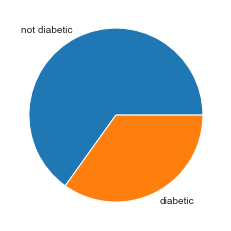

In [97]:
mylabels = ["not diabetic", "diabetic"]
stat = data['Outcome'].value_counts()
plt.pie(stat, labels = mylabels)
plt.show()

We can conclude that the dataset is not balanced.

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 60.0 KB


All the types of the features is acceptbles as input for machine learning algorithms

We dont need this column

In [99]:
pd.DataFrame(round((data.isnull().sum()/len(data))*100, 2), columns=['pourcentage of missing values']).sort_values(by='pourcentage of missing values', ascending=False)

,pourcentage of missing values
Insulin,48.70
SkinThickness,29.56
Pregnancies,14.45
BloodPressure,4.56
BMI,1.43
Glucose,0.65
DiabetesPedigreeFunction,0.00
Age,0.00
Outcome,0.00


We have lot of missing values that we are going to handle. 

###  Data visualization

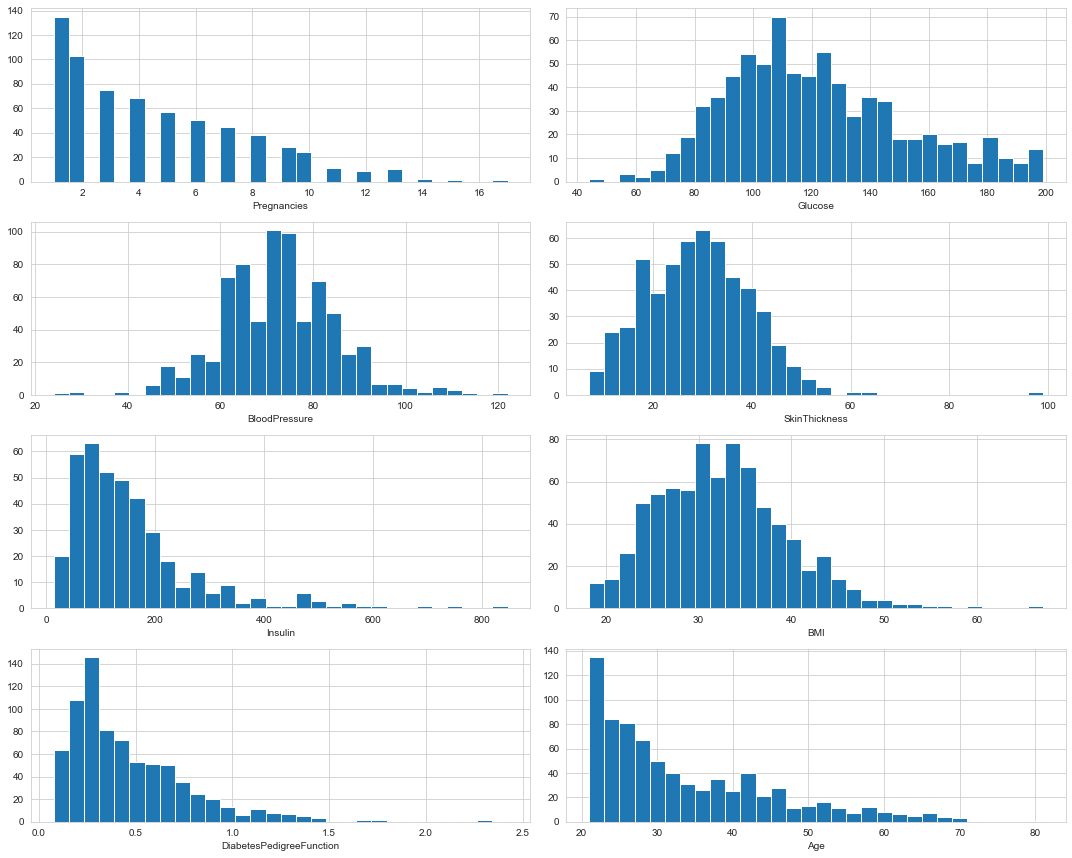

In [100]:
sns.set_style('whitegrid')
n_bis = 30 
fig, axis = plt.subplots(figsize=(15,12), nrows=4, ncols=2)

axis[0, 0].hist(data['Pregnancies'], n_bis)
axis[0, 0].set_xlabel('Pregnancies')

axis[0, 1].hist(data['Glucose'], n_bis)
axis[0, 1].set_xlabel('Glucose')

axis[1, 0].hist(data['BloodPressure'], n_bis)
axis[1, 0].set_xlabel('BloodPressure')

axis[1, 1].hist(data['SkinThickness'], n_bis)
axis[1, 1].set_xlabel('SkinThickness')

axis[2, 0].hist(data['Insulin'], n_bis)
axis[2, 0].set_xlabel('Insulin')

axis[2, 1].hist(data['BMI'], n_bis)
axis[2, 1].set_xlabel('BMI')

axis[3, 0].hist(data['DiabetesPedigreeFunction'], n_bis)
axis[3, 0].set_xlabel('DiabetesPedigreeFunction')

axis[3, 1].hist(data['Age'], n_bis)
axis[3, 1].set_xlabel('Age')

fig.tight_layout()
plt.show()

### Descriptive statistics

In [58]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data wrangling

In [101]:
iterative_imputer = IterativeImputer(estimator=ExtraTreesRegressor(),random_state=42, missing_values=np.NaN, max_iter= 50)
df = iterative_imputer.fit_transform(data)

In [102]:
data_cleaned = pd.DataFrame(df, columns=data.columns)

In [103]:
# I deleted the main dataframe to optimize my space
del data

### Feature engineering 

In [104]:
bins = [18,27,45,50,60,np.inf]
labels=['Young','Adult','Middle age','Old age', 'very old']
data_cleaned.insert(8, 'AgeGroup', pd.cut(data_cleaned["Age"], bins, labels = labels))

In [105]:
data_cleaned[["Outcome", "AgeGroup"]].groupby(['AgeGroup'], as_index=False).count().sort_values(by='Outcome', ascending=False)

,AgeGroup,Outcome
0,Young,332
1,Adult,318
3,Old age,54
2,Middle age,37
4,very old,27


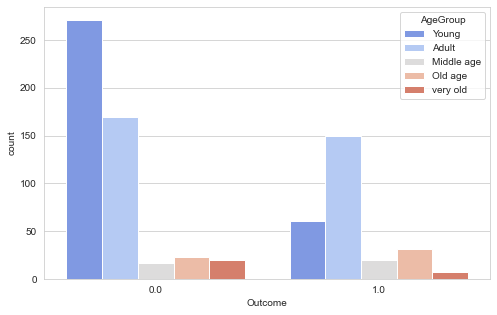

In [106]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Outcome',hue='AgeGroup',data=data_cleaned, palette='coolwarm')
plt.show()

The number of people in each age group per class.

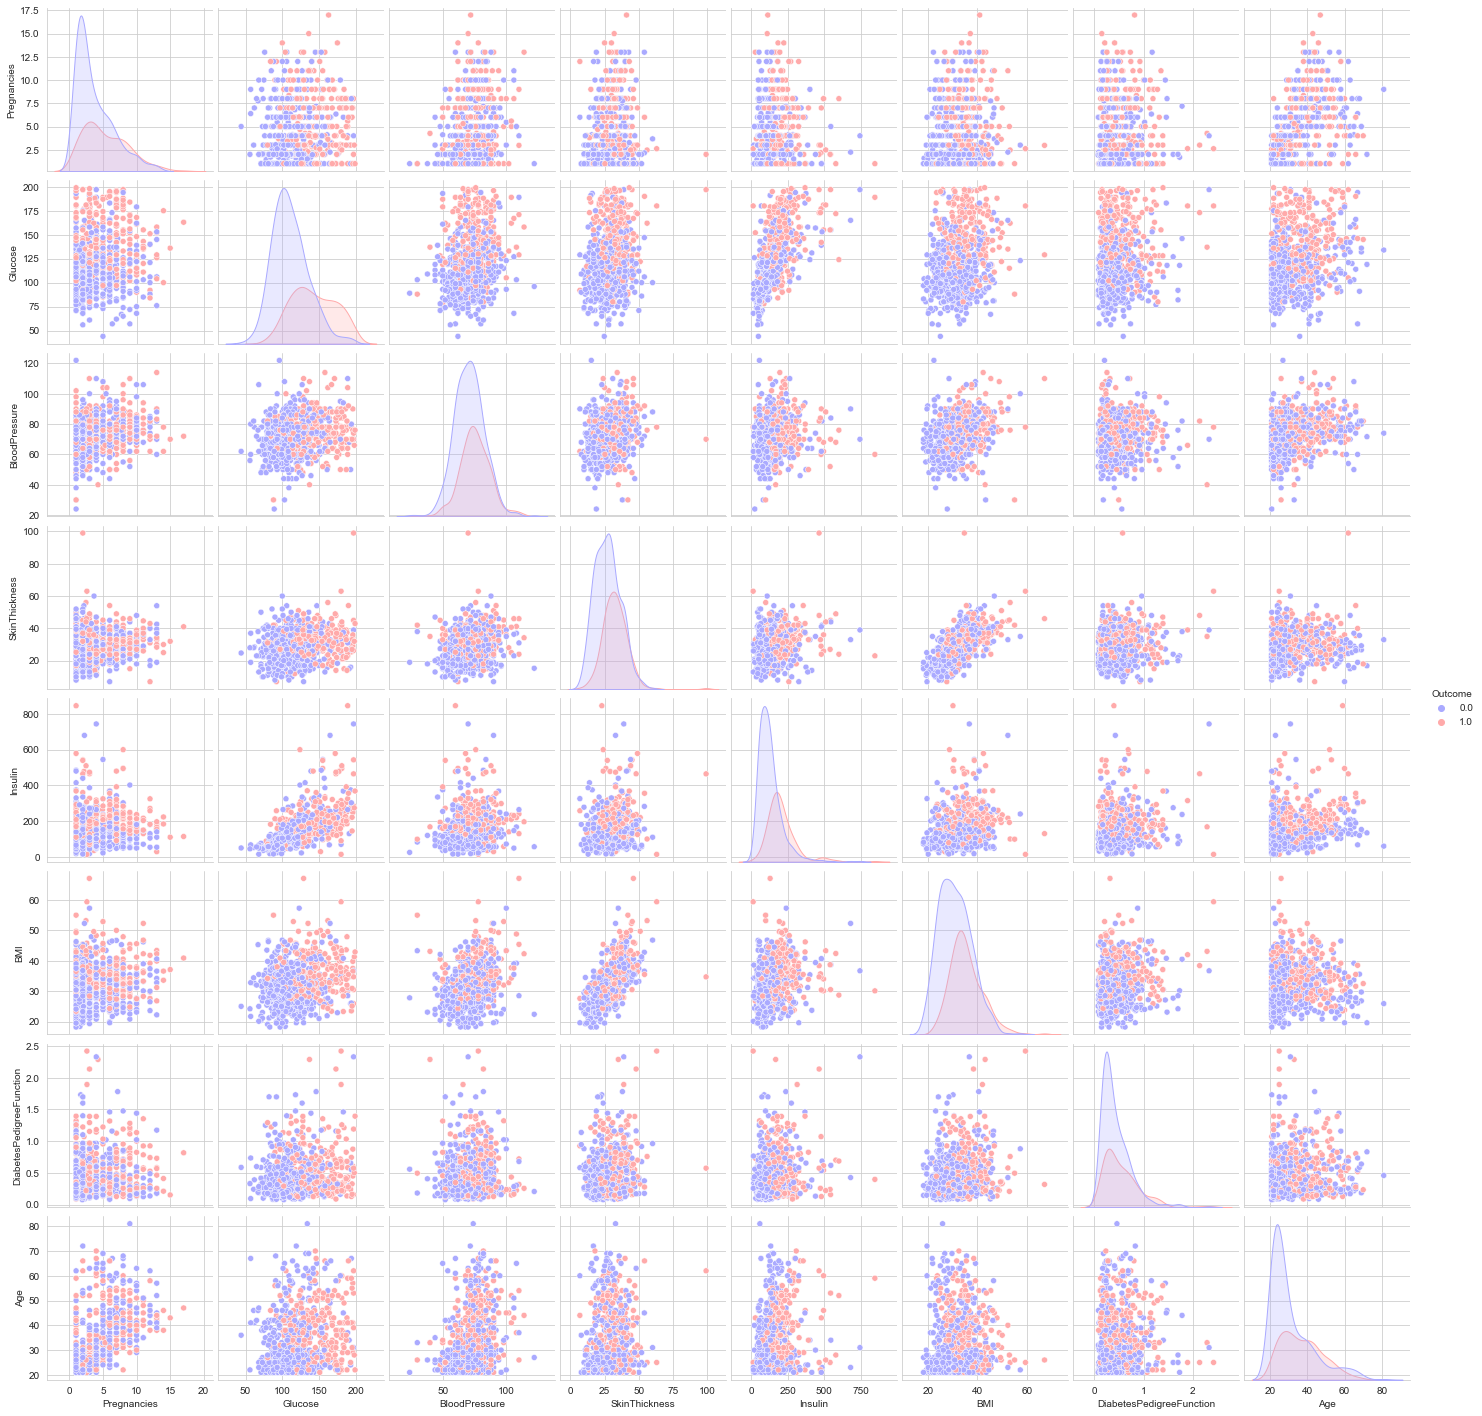

In [107]:
sns.pairplot(data_cleaned, hue='Outcome',palette='bwr')
plt.show()

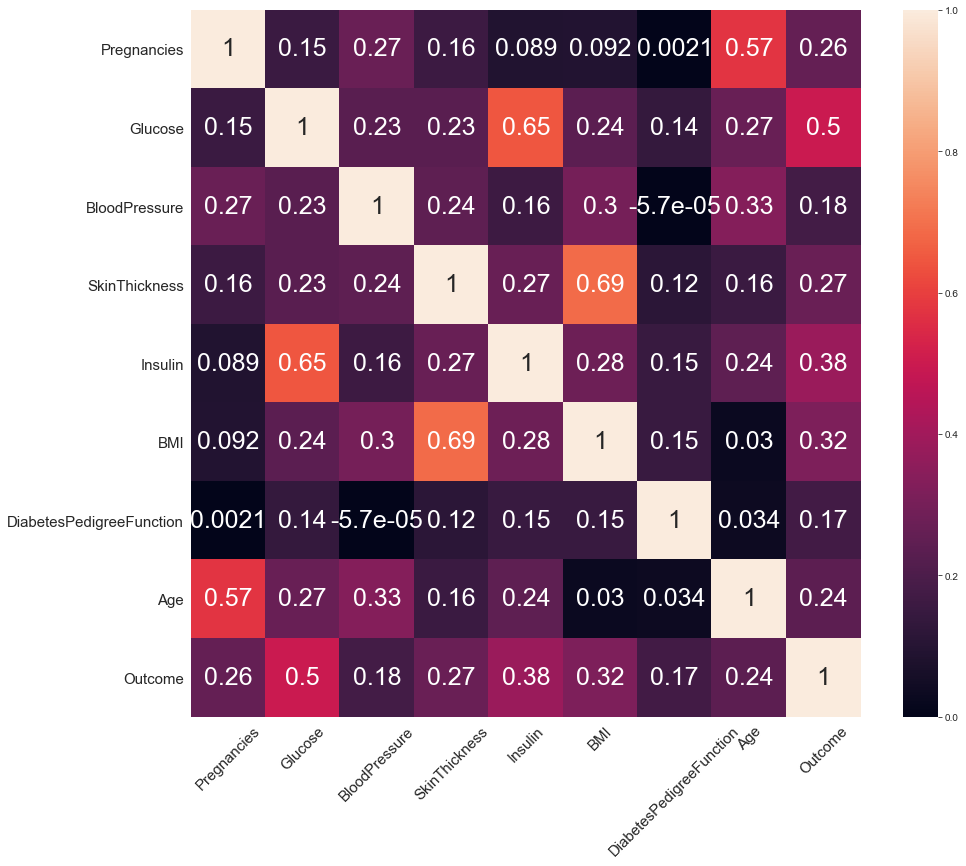

In [108]:
corr = data_cleaned.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,annot = True, annot_kws = {'size':25})
heat_map = plt.gcf()
heat_map.set_size_inches(15,13)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation=45)
plt.show()

The correlation betwen some numerical features is weak while other is good, yet non of the correlation reached 0.7.

### Outliers

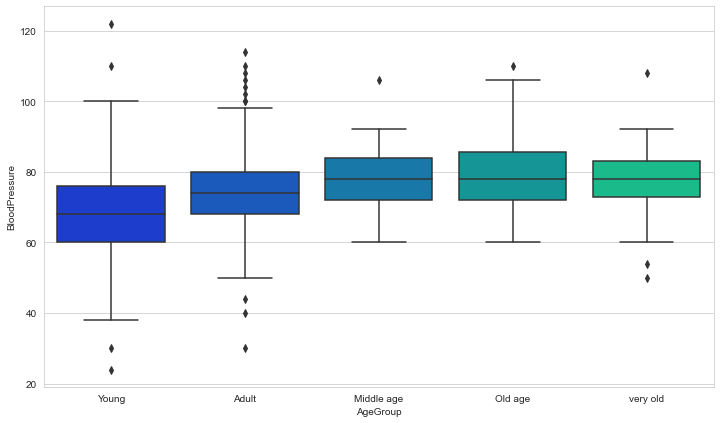

In [109]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='AgeGroup',y='BloodPressure', data=data_cleaned, palette='winter')
plt.show()

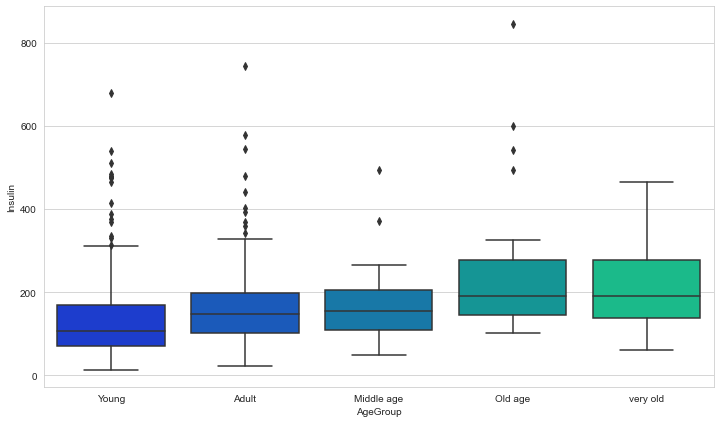

In [110]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='AgeGroup',y='Insulin', data=data_cleaned, palette='winter')
plt.show()

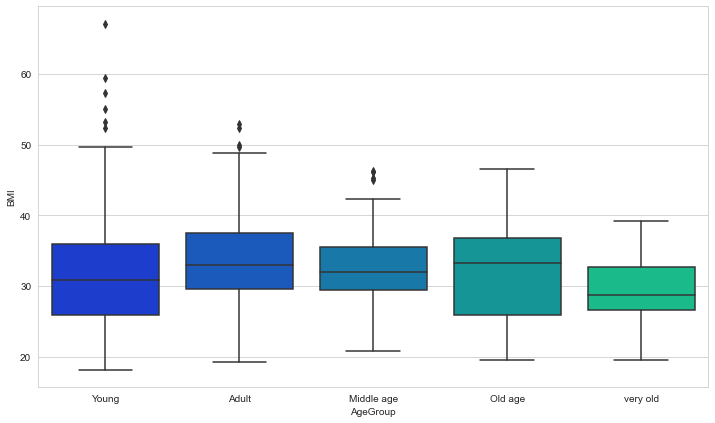

In [111]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='AgeGroup',y='BMI', data=data_cleaned, palette='winter')
plt.show()

### Converting categorical features into numerical

In [112]:
encoder = LabelEncoder()
data_cleaned.AgeGroup = encoder.fit_transform(data_cleaned.AgeGroup)

In [113]:
model = IsolationForest(contamination=0.01)
model.fit(data_cleaned)
outliers = model.predict(data_cleaned)
boolean_outliers = outliers == -1

# data without outliers
data_cleaned = data_cleaned.drop(data_cleaned[boolean_outliers].index)

### Feature selections

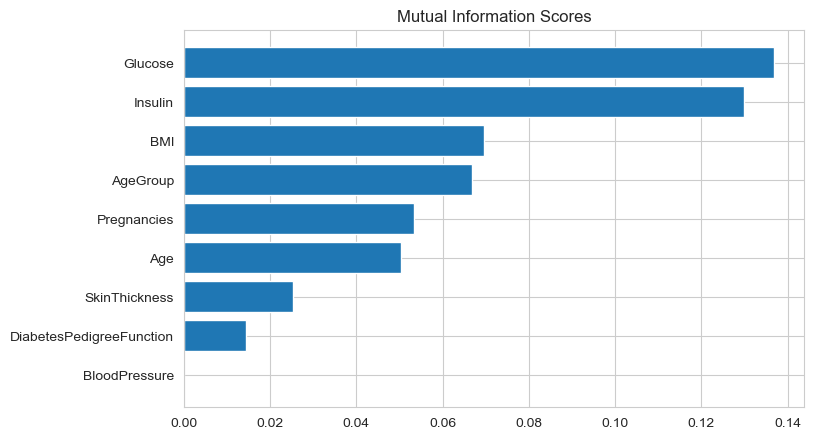

In [114]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(make_mi_scores(data_cleaned.drop('Outcome', axis=1), data_cleaned['Outcome']))

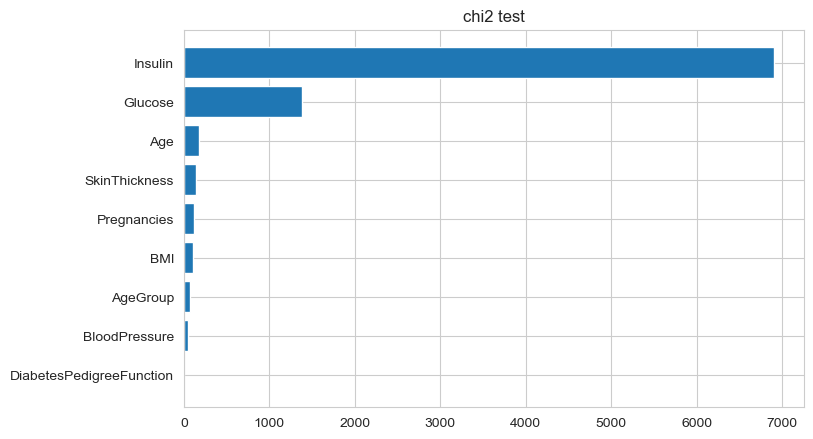

In [115]:
def make_chi2_scores(X, y):
    chi2_scores = chi2(X, y)
    chi2_scores = pd.Series(chi2_scores[0], name="Chi2", index=X.columns)
    chi2_scores = chi2_scores.sort_values(ascending=False)
    return chi2_scores

def plot_chi2_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("chi2 test")

plt.figure(dpi=100, figsize=(8, 5))
plot_chi2_scores(make_chi2_scores(data_cleaned.drop('Outcome', axis=1), data_cleaned['Outcome']))

In [116]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeGroup']

## Split data

In [117]:
X = data_cleaned[features]
y = data_cleaned['Outcome']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model 1: Decision Tree

In [ ]:
max_depth = np.arange(0,20)
leafs     = np.arange(0,20)
criterion = ['entropy', 'gini']

grid_param = [{'criterion': criterion , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 4)

In [ ]:
grid_decision_tree.fit(x_train, y_train)

In [ ]:
grid_decision_tree.best_params_

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)

In [ ]:
decision_tree.fit(x_train, y_train)

In [ ]:
print(classification_report(y_test, decision_tree.predict(x_test)))

In [ ]:
confusion_matrix_decision_tree = confusion_matrix(y_test, decision_tree.predict(x_test))

In [ ]:
#Confusion Matrix Visualization for Decision Tree

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_decision_tree,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## Model 2: Support Vector Machine Classifier

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid_svc = GridSearchCV(SVC(), param_grid)

In [ ]:
grid_svc.fit(x_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc = SVC(C=1, gamma=0.0001, kernel='linear')
svc.fit(x_train, y_train) 

Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.



In [ ]:
print(classification_report(y_test, svc.predict(x_test)))

In [ ]:
confusion_matrix_svc = confusion_matrix(y_test, svc.predict(x_test))

In [ ]:
#Confusion Matrix Visualization for SVM

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_svc,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

### Model 3: kMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

In [ ]:
print(classification_report(y, kmeans.labels_))

In [ ]:
confusion_matrix_kmeans = confusion_matrix(y, kmeans.labels_)

In [ ]:
#Confusion Matrix Visualization for SVM

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_kmeans,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

Not so bad considering the algorithm is purely using the features to cluster the patents into 2 distinct groups

## PCA

In [ ]:
pca = PCA(n_components=2)
X_2D_train = pca.fit_transform(x_train)
X_2D_test = pca.transform(x_test)

In [ ]:
# we didn't lost lot of information based on the explained variance 96%
pca.explained_variance_ratio_.sum()

In [ ]:
df_comp = pd.DataFrame(pca.components_, columns=data_cleaned.columns[0:9])

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)
plt.show()

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.



## PCA for Decision Tree

In [ ]:
max_depth = np.arange(0,20)
leafs     = np.arange(0,20)
criterion = ['entropy', 'gini']

grid_param = [{'criterion': criterion , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 4)

In [ ]:
grid_decision_tree.fit(X_2D_train, y_train)

In [ ]:
grid_decision_tree.best_params_

In [ ]:
decision_tree_pca = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=9)

In [ ]:
decision_tree_pca.fit(X_2D_train, y_train)

In [ ]:
print(classification_report(y_test, decision_tree_pca.predict(X_2D_test)))

In [ ]:
confusion_matrix_decision_tree_pca = confusion_matrix(y_test, decision_tree_pca.predict(X_2D_test))

In [ ]:
#Confusion Matrix Visualization for decision tree

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_decision_tree_pca,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## PCA for SVM Classifier

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_svc = GridSearchCV(SVC(), param_grid)

In [ ]:
grid_svc.fit(X_2D_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc_pca = SVC(C=100, gamma=0.0001, kernel='linear')
svc_pca.fit(X_2D_train, y_train) 

In [ ]:
print(classification_report(y_test, svc_pca.predict(X_2D_test)))

In [ ]:
confusion_matrix_svc_pca = confusion_matrix(y_test, svc_pca.predict(X_2D_test))

In [ ]:
#Confusion Matrix Visualization for SVM

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_svc_pca,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## PCA for k-means visualization

In [ ]:
kmeans_pca = KMeans(n_clusters=2)
y_pred_pca = kmeans_pca.fit_predict(X_2D_train)

In [ ]:
print(" The Mean squared Error for the centroides:", kmeans_pca.inertia_ )

In [ ]:
centers = kmeans_pca.cluster_centers_
centers

In [ ]:
centers[:,0]

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_2D_train[:,0],X_2D_train[:,1], c=y_train, cmap='plasma')
plt.scatter(centers[:,0], centers[:,1], marker="*", s=200,c='r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

Clearly by using these two components we can easily separate these two classes.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_2D_train[:,0],X_2D_train[:,1], c=y_pred_pca, cmap='plasma')
plt.scatter(centers[:,0], centers[:,1], marker="*", s=200,c='r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

We can see that there is a similarity between the 2 graphs which means that our prediction is not bad 

## Normalized dataset

In [ ]:
scl = StandardScaler()
x_train_normalized = scl.fit_transform(x_train)
x_test_normalized = scl.transform(x_test)

In [ ]:
x_train_normalized = pd.DataFrame(x_train_normalized, columns=x_train.columns[0:9])
x_test_normalized = pd.DataFrame(x_test_normalized, columns=x_test.columns[0:9])

## Decision tree with normalized dataset

In [ ]:
decision_tree_ = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=8)
decision_tree_.fit(x_train_normalized, y_train)
print(classification_report(y_test, decision_tree_.predict(x_test_normalized)))

## SVM classifier with normalized dataset

In [ ]:
svc_ = SVC(C=100, gamma=0.0001, kernel='linear')
svc_.fit(x_train_normalized, y_train)
print(classification_report(y_test, svc_.predict(x_test_normalized)))

## K-means cluster with normalized dataset

In [ ]:
kmeans_ = KMeans(n_clusters=2)
kmeans_.fit(x_train_normalized, y_train)
print(classification_report(y_test, kmeans_.predict(x_test_normalized)))

# Result analysis

In [ ]:
def dict_data(model1, model2, model3, x_test, y_test):
    data = {'Decision Tree':[recall_score(y_test, model1.predict(x_test)), precision_score(y_test, model1.predict(x_test)),  f1_score(y_test, model1.predict(x_test))], 
        'SVM Classifier':[recall_score(y_test, model2.predict(x_test)), precision_score(y_test, model2.predict(x_test)), f1_score(y_test, model2.predict(x_test))], 
        'K-means':[recall_score(y_test, model3.predict(x_test)), precision_score(y_test, model3.predict(x_test)), f1_score(y_test, model3.predict(x_test))]}
    return data

#### Dataset

In [ ]:
comparasion = pd.DataFrame(dict_data(decision_tree, svc, kmeans, x_test, y_test))
comparasion.index = ['Precision', 'Recall', 'F1 score']

In [ ]:
comparasion

#### Normalized dataset

In [ ]:
comparasion_ = pd.DataFrame(dict_data(decision_tree_, svc_, kmeans_, x_test_normalized, y_test))
comparasion_.index = ['Precision', 'Recall', 'F1 score']

In [ ]:
comparasion_

# Logistic Regression

In [119]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeGroup']

In [120]:
Xl = data_cleaned[features]
yl = data_cleaned['Outcome']

In [121]:
Xt,xt,Yt,yt=train_test_split(Xl,yl,test_size=0.25,random_state=0)

In [91]:
logistic = LogisticRegression()
encoder = LabelEncoder()
data_cleaned.AgeGroup = encoder.fit_transform(data_cleaned.AgeGroup)


In [122]:
logistic.fit(Xt,Yt)

LogisticRegression()

In [124]:
y_pred=logistic.predict(xt)

In [129]:
cnf_matrix = metrics.confusion_matrix(yt, y_pred)
cnf_matrix

array([[111,  20],
       [ 22,  37]], dtype=int64)

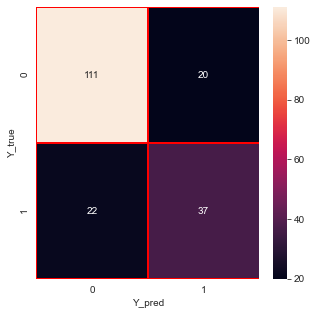

In [130]:

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cnf_matrix,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

In [133]:
max_depth = np.arange(0,20)
leafs     = np.arange(0,20)
criterion = ['entropy', 'gini']

grid_param = [{'criterion': criterion , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 4)
grid_decision_tree.fit(Xt, Yt)
grid_decision_tree.best_params_
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1)
decision_tree.fit(Xt, Yt)
print(classification_report(yt, decision_tree.predict(xt)))
confusion_matrix_decision_tree = confusion_matrix(yt, decision_tree.predict(xt))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       131
         1.0       0.66      0.73      0.69        59

    accuracy                           0.80       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.81      0.80      0.80       190



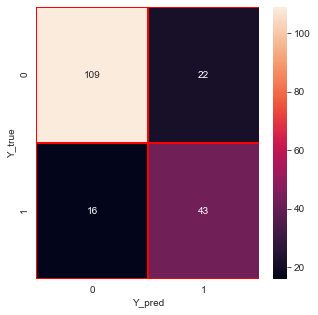

In [134]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix_decision_tree,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()